In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import time
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.preprocessing import MinMaxScaler

In [32]:
datapath='/Users/soni6/github/soccer-analytics/data/archive/Datasets'
finalData=pd.read_csv(datapath+'/finalData.csv')

# finalData=finalData[finalData['FTR']!=0]
X=finalData.drop(columns=['FTR'])
# X=X.drop(columns=['HomeForm','AwayForm'])
y=finalData['FTR']
print(X.shape,finalData.columns)

#Define scaler (we're using the defaults here)
MMS = MinMaxScaler()
#Apply transformation 
X = MMS.fit_transform(X)

(6383, 41) Index(['FTR', 'FTHG-H', 'FTAG-H', 'FTR-H', 'HTHG-H', 'HTAG-H', 'HTR-H', 'HS-H',
       'AS-H', 'HST-H', 'AST-H', 'HC-H', 'AC-H', 'HF-H', 'AF-H', 'HY-H',
       'AY-H', 'HR-H', 'AR-H', 'FTHG-A', 'FTAG-A', 'FTR-A', 'HTHG-A', 'HTAG-A',
       'HTR-A', 'HS-A', 'AS-A', 'HST-A', 'AST-A', 'HC-A', 'AC-A', 'HF-A',
       'AF-A', 'HY-A', 'AY-A', 'HR-A', 'AR-A', 'HomeForm', 'AwayForm',
       'PreviousEncounters', 'HomePreviousPosition', 'AwayPreviousPosition'],
      dtype='object')


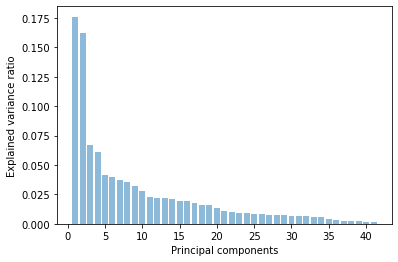

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True,
                                                    random_state=1)
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)
plt.bar(range(1, 42), pca.explained_variance_ratio_, alpha=0.5, align='center')
# plt.step(range(1, 110), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

## KNN

In [35]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

#Define and fit model
#Choose some parameters to search over
params = {
    'estimator__n_neighbors': [5,20,50,200],
    "estimator__weights": ['distance'],
    "estimator__p":[1,2]
}
model_to_set = OneVsRestClassifier(KNeighborsRegressor())
model = GridSearchCV(model_to_set, params, cv=3, scoring='accuracy', return_train_score=True)
t1=time.time()
model.fit(X_train,y_train)

#Print out some results
print("The best model is:",model.best_params_)
print("\nThe accuracy of the best model is:", model.best_score_)
t2=time.time()
print("Time to train", round(t2-t1,2))

y_preds = model.predict(X_test)
accuracy = sklearn.metrics.accuracy_score(y_test, y_preds)
# fpr, tpr, thresholds = roc_curve(y_test, y_preds, pos_label=1)
# auc_roc = auc(fpr, tpr)
print("Testing set accuracy",accuracy)

The best model is: {'estimator__n_neighbors': 200, 'estimator__p': 1, 'estimator__weights': 'distance'}

The accuracy of the best model is: 0.5215432824128476
Time to train 70.36
Testing set accuracy 0.5544244322631167


## SVM

In [ ]:

# pca = PCA(n_components = 30)
# X_train_pca = pca.fit_transform(X_train)
# X_test_pca = pca.fit_transform(X_test)
# # comment below if without PCA
# X_train=X_train_pca
# X_test=X_test_pca



In [23]:
# with grid search 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)
model_to_set = OneVsRestClassifier(SVC(gamma='scale'))
parameters = {
    "estimator__C": [0.1,1,10,100],
    "estimator__kernel": ["linear","poly"],
}
t1=time.time()
clfSV = GridSearchCV(model_to_set,cv=3,scoring='accuracy', param_grid=parameters)

clfSV.fit(X_train,y_train)

#Print out some results
print("The best model is:",clfSV.best_params_)
print("\nThe accuracy of the best model is:", clfSV.best_score_)
t2=time.time()
print("Time to train", round(t2-t1,2))


y_preds = clfSV.predict(X_test)
# fpr, tpr, thresholds = roc_curve(y_test, y_preds, pos_label=1)
# auc_roc = auc(fpr, tpr)
accuracy = sklearn.metrics.accuracy_score(y_test, y_preds)
print("Testing set accuracy",accuracy)



The best model is: {'estimator__C': 100, 'estimator__kernel': 'linear'}

The accuracy of the best model is: 0.5615469445583797
Time to train 875.85
Testing set accuracy 0.5848563968668408


## Neural network

In [38]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

encoder = LabelEncoder()

# training
encoder.fit(y_train)
encoded_y_train = encoder.transform(y_train)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y_train = np_utils.to_categorical(encoded_y_train)
# testing
encoder.fit(y_test)
encoded_y_test = encoder.transform(y_test)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y_test = np_utils.to_categorical(encoded_y_test)



In [40]:
# Neural network
model = Sequential()
model.add(Dense(200, input_dim=41, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, dummy_y_train, epochs=300)
y_pred = model.predict(X_test)


Epoch 1/300
4468/4468 [==============================] - 2s 358us/step - loss: 1.0007 - accuracy: 0.5116
Epoch 2/300
4468/4468 [==============================] - 1s 178us/step - loss: 0.9662 - accuracy: 0.5454
Epoch 3/300
4468/4468 [==============================] - 1s 175us/step - loss: 0.9534 - accuracy: 0.5468
Epoch 4/300
4468/4468 [==============================] - 1s 216us/step - loss: 0.9431 - accuracy: 0.5564
Epoch 5/300
4468/4468 [==============================] - 1s 221us/step - loss: 0.9433 - accuracy: 0.5501
Epoch 6/300
4468/4468 [==============================] - 1s 248us/step - loss: 0.9292 - accuracy: 0.5640
Epoch 7/300
4468/4468 [==============================] - 1s 198us/step - loss: 0.9244 - accuracy: 0.5660
Epoch 8/300
4468/4468 [==============================] - 1s 180us/step - loss: 0.9233 - accuracy: 0.5665
Epoch 9/300
4468/4468 [==============================] - 1s 218us/step - loss: 0.9221 - accuracy: 0.5703
Epoch 10/300
4468/4468 [==============================]

In [30]:
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))

#Converting one hot encoded test label to label
test = list()
for i in range(len(dummy_y_test)):
    test.append(np.argmax(dummy_y_test[i]))
    
a = sklearn.metrics.accuracy_score(pred,test)
print('Accuracy is:', a*100)

Accuracy is: 44.595300261096604


## Merging loss with draws